In [21]:
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv("C:/Users/paul8/Downloads/responses_subset.csv")
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [20]:
data = data.loc[:,data.dtypes != 'object']
Y = data.Age > 18
X = data.drop("Age", axis=1)

Y.head()

0    True
1    True
2    True
3    True
4    True
Name: Age, dtype: bool

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

model = XGBClassifier()
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


In [27]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(Y_test, pred_test)
tn, fp, fn, tp = confusion_matrix(Y_test, pred_test).ravel()

In [39]:
pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred_proba[:,1])
print(thresholds)

[1.9999533  0.99995327 0.9971071  0.9971052  0.9950275  0.99488235
 0.99317026 0.9931172  0.98995996 0.9899553  0.9887128  0.98864114
 0.98789036 0.9878306  0.986839   0.986753   0.9858484  0.9858101
 0.9852822  0.9839049  0.9835708  0.98284644 0.98115414 0.98078054
 0.9781904  0.9767991  0.9764895  0.9753695  0.97305375 0.97230816
 0.96415055 0.96380997 0.951289   0.9505605  0.94304895 0.94113624
 0.93319017 0.92991716 0.9293619  0.9290444  0.9031294  0.90300584
 0.9009154  0.90031224 0.84643096 0.8449771  0.8444356  0.83739996
 0.8359733  0.82763237 0.79469746 0.7857208  0.7781055  0.7654516
 0.75831544 0.75396574 0.7519388  0.7460657  0.74518216 0.7393597
 0.7178979  0.7122071  0.7063215  0.6752661  0.64277124 0.6351783
 0.592381   0.5774918  0.5454906  0.5345284  0.5233594  0.5109507
 0.50517154 0.46681315 0.4408942  0.42845052 0.4165467  0.39749998
 0.39460686 0.37937167 0.31283054 0.29376552 0.20792107 0.15707588
 0.10024819 0.06164688 0.04144758 0.01172732]


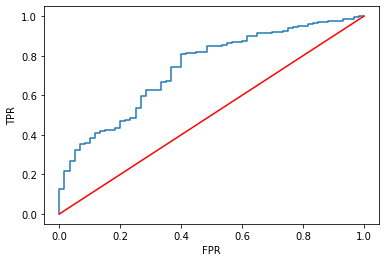

In [43]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],c="r")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [35]:
test_data = pd.read_csv("C:/Users/paul8/Downloads/responses_to_predict.csv")
test_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,5.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,4.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,...,5.0,185.0,72.0,1.0,male,right handed,secondary school,no,village,house/bungalow


In [37]:
test_data = test_data.loc[:,test_data.dtypes != 'object']

test_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Height,Weight,Number of siblings
0,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,1.0,2.0,5.0,2.0,2.0,2,5.0,173.0,75.0,0.0
1,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,2.0,1.0,5.0,3.0,3,3.0,173.0,58.0,1.0
2,5.0,5.0,4.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,...,5.0,4.0,2.0,3.0,1.0,1,5.0,185.0,72.0,1.0


In [38]:
pred_test_data = model.predict(test_data)
pred_test_data

array([1, 1, 1])